Seaborn Exercises

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [58]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [2]:
from env import username, password, host, get_db_url

In [7]:
iris_url = get_db_url('iris_db')

In [8]:
query = '''SELECT * FROM measurements'''

In [9]:
#verify connection to database and correct data pull
pd.read_sql(query, iris_url)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


#1 - What does the distribution of petal lengths look like?

In [15]:
#pull petal lengths column from measurements table
petal_length = pd.read_sql('''SELECT petal_length FROM measurements''', get_db_url('iris_db'))

In [18]:
petal_length.head()

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [19]:
petal_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


<AxesSubplot:ylabel='Frequency'>

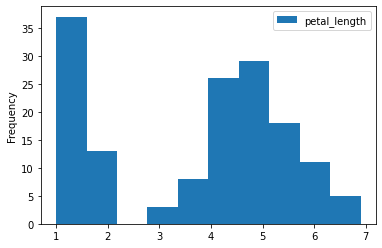

In [16]:
#plot petal lengths to view the distribution plt plot
petal_length.plot.hist()

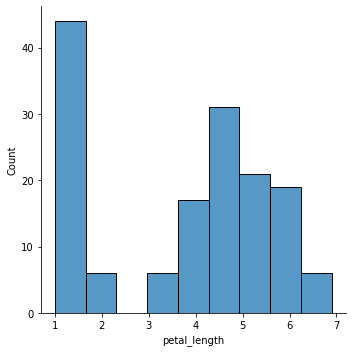

In [23]:
#seaborn plot
sns.displot(data = petal_length, x = 'petal_length')

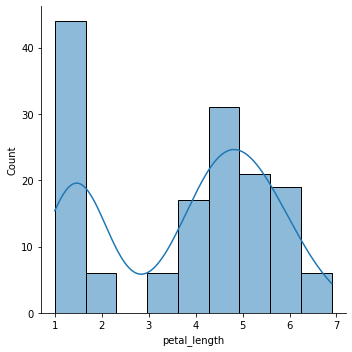

In [24]:
#seaborn plot with line overlay
sns.displot(data = petal_length, x = 'petal_length', kde = True)

#2 - Is there a correlation between petal length and petal width?

In [114]:
#pull petal length, petal width, and species id from database
length_width = pd.read_sql('''SELECT petal_length, petal_width, species_id FROM measurements''', get_db_url('iris_db'))

In [115]:
#verify data pull
length_width.head()

,petal_length,petal_width,species_id
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [116]:
length_width.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   species_id    150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


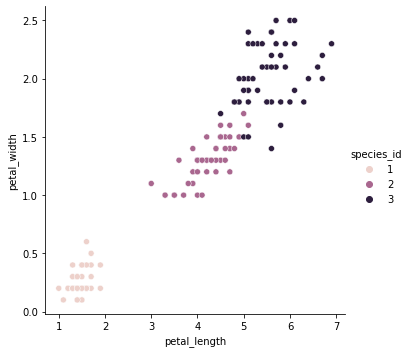

In [117]:
#view the relational data with a scatter plot (seaborn) filtered by 'species id'
sns.relplot(data = length_width, x = 'petal_length', y = 'petal_width', hue = 'species_id')

In [118]:
#calculate correlation
length_width.corr()
#yes there is a correlation between length and width

,petal_length,petal_width,species_id
petal_length,1.000000,0.962865,0.949035
petal_width,0.962865,1.000000,0.956547
species_id,0.949035,0.956547,1.000000


<AxesSubplot:xlabel='species_id', ylabel='petal_length'>

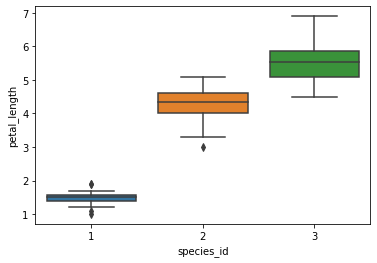

In [137]:
#compare petal dimensions and species with a categorical plot
sns.boxplot(data = length_width, y = 'petal_length', x = 'species_id')

<AxesSubplot:xlabel='species_id', ylabel='petal_width'>

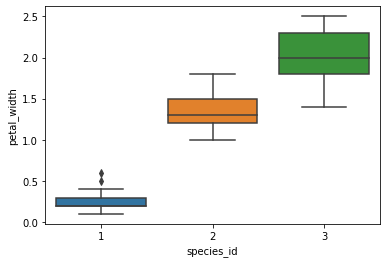

In [139]:
sns.boxplot(data = length_width, y = 'petal_width', x = 'species_id')

#3 - Would it be reasonable to predict species based on sepal width and sepal length? 
#For this, you'll visualize two numeric columns through the lense of a categorical column.

In [133]:
#pull sepal dimension data from database
slength_swidth = pd.read_sql('''SELECT sepal_length, sepal_width, species_id FROM measurements''', get_db_url('iris_db'))

In [134]:
#verify data pull
slength_swidth.head()

,sepal_length,sepal_width,species_id
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


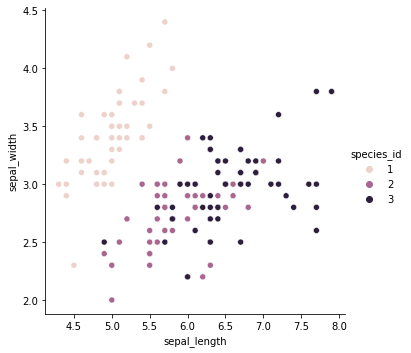

In [136]:
#plot sepal dimensions filtered by species
sns.relplot(data = slength_swidth, x = 'sepal_length', y = 'sepal_width', hue = 'species_id')

#4 - Which features would be best used to predict species?

In [140]:
#pull the full measurement table for comparisons
iris_df = pd.read_sql('''SELECT * FROM measurements''', get_db_url('iris_db'))


In [142]:
#sample the dataset
iris_df.sample(10)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
25,26,5.0,3.0,1.6,0.2,1
74,75,6.4,2.9,4.3,1.3,2
51,52,6.4,3.2,4.5,1.5,2
148,149,6.2,3.4,5.4,2.3,3
47,48,4.6,3.2,1.4,0.2,1
139,140,6.9,3.1,5.4,2.1,3
90,91,5.5,2.6,4.4,1.2,2
11,12,4.8,3.4,1.6,0.2,1
133,134,6.3,2.8,5.1,1.5,3
127,128,6.1,3.0,4.9,1.8,3


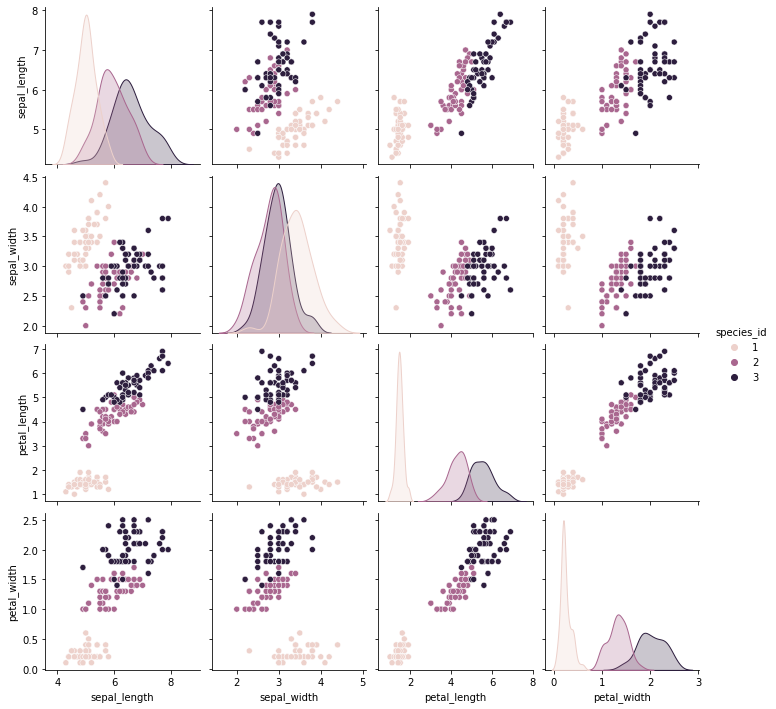

In [143]:
#create the comparison plots
sns.pairplot(data = iris_df.iloc[:, 1:], hue = 'species_id')
#the iloc[] removes the measurement_id column

In [145]:
#calculate correlation stats
iris_df.corr()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
measurement_id,1.000000,0.716676,-0.402301,0.882637,0.900027,0.942830
sepal_length,0.716676,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.882637,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.900027,0.817941,-0.366126,0.962865,1.000000,0.956547
species_id,0.942830,0.782561,-0.426658,0.949035,0.956547,1.000000


Section Two --

#1 - Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
Use pandas to group the data by the dataset column, 
and calculate summary statistics for each dataset. What do you notice?

In [32]:
anscombe = sns.load_dataset('anscombe')

In [44]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [55]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

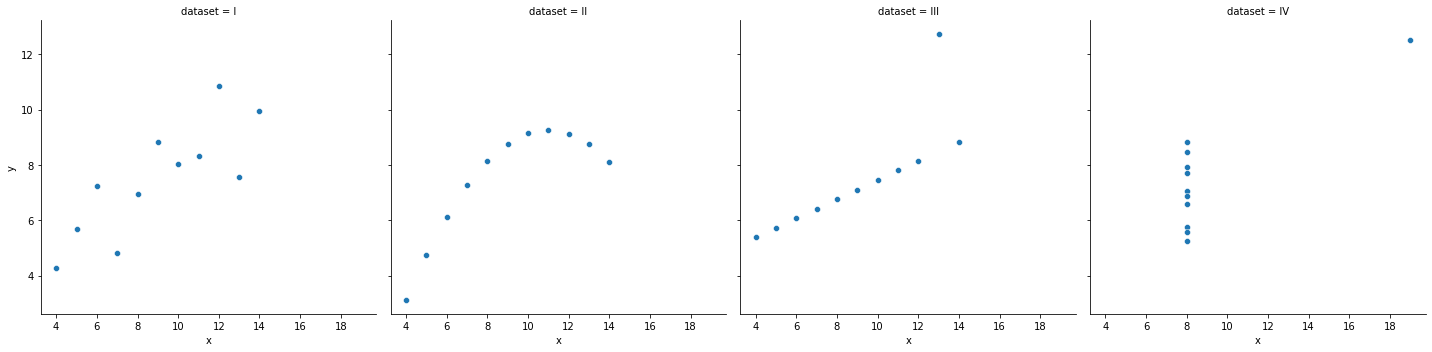

In [56]:
#plot the x and y with a relational plot and seperate by the dataset number with the 'col='dataset'' keyword argument within the seaborn plot call
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

#2 - Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [147]:
#pull the insect sprays data from pydataset
insect_sprays = data('InsectSprays')

In [149]:
#show documentation from insect sprays
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [61]:
#look at the data set info
insect_sprays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [62]:
#view a smaple of the dataset
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

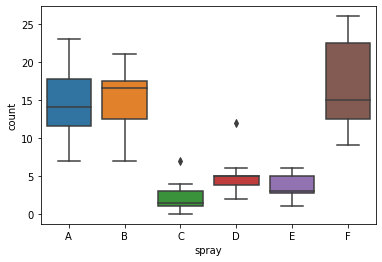

In [66]:
#plot the data set in a boxplot
sns.boxplot(data = insect_sprays, x = 'spray', y = 'count')

#3 - Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose - a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [152]:
#load the 'swiss' dataset
swiss = data('swiss')

In [153]:
#show documentation for swiss
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [154]:
#look at the dataset info
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [155]:
#sample the dataset
swiss.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Broye,83.8,70.2,16,7,92.85,23.6
Moutier,85.8,36.5,12,7,33.77,20.3
Le Locle,72.7,16.7,22,13,11.22,18.9
Vevey,58.3,26.8,25,19,18.46,20.9
Lausanne,55.7,19.4,26,28,12.11,20.2
Rive Droite,44.7,46.6,16,29,50.43,18.2
Sion,79.3,63.1,13,13,96.83,18.1
Neuchatel,64.4,17.6,35,32,16.92,23.0
Boudry,70.4,38.4,26,12,5.62,20.3
Cossonay,61.7,69.3,22,5,2.82,18.7


In [156]:
#add a column with boolean values for if the county is catholic
swiss['is_catholic'] = swiss.Catholic > 50.00

In [157]:
#sample the dataset with the new column
swiss.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Val de Ruz,77.6,37.6,15,7,4.97,20.0,False
La Chauxdfnd,65.7,7.7,29,11,13.79,20.5,False
Payerne,74.2,58.1,14,8,5.23,23.8,False
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Delemont,83.1,45.1,6,9,84.84,22.2,True
Vevey,58.3,26.8,25,19,18.46,20.9,False
Rive Gauche,42.8,27.7,22,29,58.33,19.3,True
Grandson,71.7,34.0,17,8,3.30,20.0,False
Oron,72.5,71.2,12,1,2.40,21.0,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

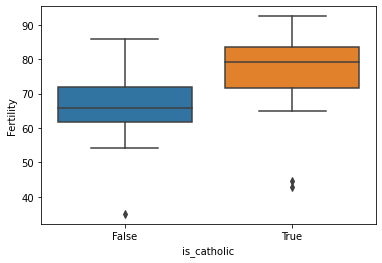

In [158]:
#compare fertility rates between catholic and non catholic counties
sns.boxplot(data = swiss, y = 'Fertility', x = 'is_catholic')

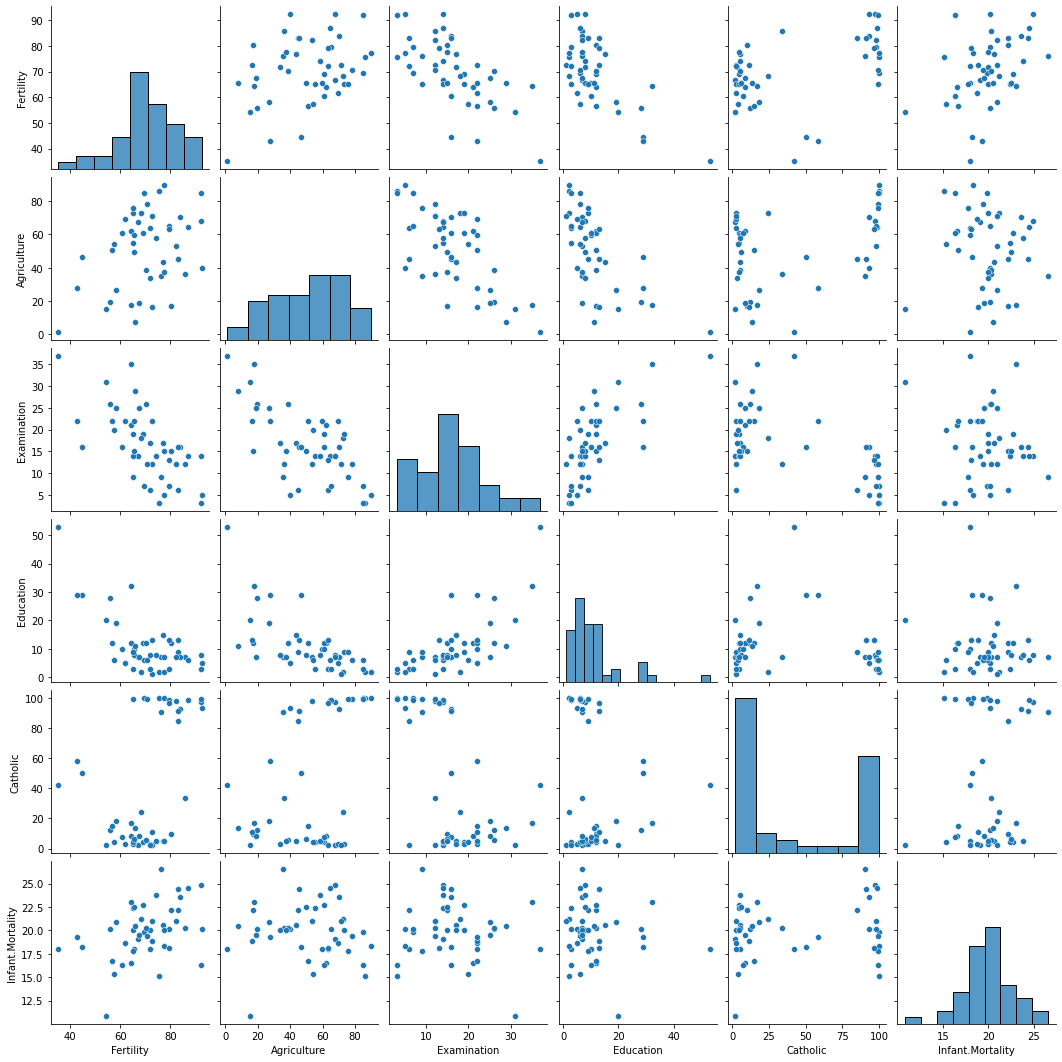

In [159]:
#use pairplot to plot correlations
sns.pairplot(data = swiss.iloc[:, :-1])
#iloc[] argument tells the pairplot to use all rows and all the columns except the last one 
#which was the is_catholic coulmn that was added above. a .drop could also be used to remove the column

In [85]:
#calculate the correlation values
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


#4 - Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [161]:
#pull the orders table from the chipotle database
c_orders = pd.read_sql('''SELECT * FROM orders''', get_db_url('chipotle'))

In [162]:
#sample the dataset
c_orders.sample(10)

,id,order_id,quantity,item_name,choice_description,item_price
788,789,324,1,Canned Soft Drink,[Diet Coke],$1.25
3899,3900,1563,1,Canned Soft Drink,[Lemonade],$1.25
2366,2367,942,1,Chicken Burrito,"[Roasted Chili Corn Salsa (Medium), [Rice, Fajita Veggies, Cheese, Sour Cream]]",$8.49
2935,2936,1167,1,Barbacoa Burrito,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Lettuce]]",$9.25
3570,3571,1433,1,Nantucket Nectar,[Pineapple Orange Banana],$3.39
2097,2098,846,1,Bottled Water,nan,$1.50
2549,2550,1010,1,Chicken Crispy Tacos,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Lettuce]]",$8.49
2688,2689,1068,1,Chips and Fresh Tomato Salsa,nan,$2.95
1610,1611,651,1,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Fajita Veggies, Sour Cream, Lettuce]]",$8.49
1706,1707,690,1,Nantucket Nectar,[Apple],$3.39


In [164]:
#remove the '$' and convert to float
c_orders['item_price'] = c_orders.item_price.str.replace('$', '').astype(float)

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_45318/2766896880.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  c_orders['item_price'] = c_orders.item_price.str.replace('$', '').astype(float)


In [165]:
#check changes
c_orders.sample(10)

,id,order_id,quantity,item_name,choice_description,item_price
2822,2823,1120,1,Steak Burrito,"[Roasted Chili Corn Salsa (Medium), [Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]",8.99
1516,1517,617,1,Chips and Guacamole,nan,4.45
4491,4492,1786,4,Canned Soft Drink,[Sprite],5.00
319,320,139,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Sour Cream]]",8.75
2948,2949,1171,1,Chips and Guacamole,nan,4.45
305,306,132,1,Chips,nan,2.15
2204,2205,888,1,Chips,nan,2.15
3749,3750,1499,1,Carnitas Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Pinto Beans, Cheese, Sour Cream, ...",11.89
2828,2829,1123,1,Side of Chips,nan,1.69
2575,2576,1020,1,Chips and Tomatillo Red Chili Salsa,nan,2.95


In [170]:
#group the orders by the item name and sum the price for each item type then return the top 4
top_4 = c_orders.groupby('item_name').item_price.agg(['sum']).nlargest(columns = 'sum', n=4, keep='all')

In [171]:
top_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Chicken Bowl to Steak Bowl
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum     4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


In [172]:
#verify return values
top_4

,sum
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19


In [175]:
#reset the index on a new variable so that the item name becomes a useable column for plotting
top_four = top_4.reset_index()

In [176]:
top_four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_name  4 non-null      object 
 1   sum        4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


Text(0.5, 0.98, 'revenue from top four money makers')

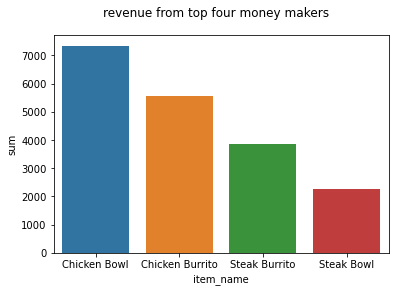

In [178]:
#plot the top four with revenue values
sns.barplot(data = top_four, y = 'sum', x = 'item_name')
plt.suptitle('revenue from top four money makers')

#5 - Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [179]:
#pull the dataset
sleep_study = data('sleepstudy')

In [183]:
#sample the returned dataset
sleep_study.sample(10)

,Reaction,Days,Subject
125,271.8274,4,351
173,297.5968,2,372
106,269.7744,5,349
48,334.8177,7,331
14,204.7070,3,309
101,236.1032,0,349
1,249.5600,0,308
81,241.6083,0,335
31,321.5426,0,330
9,430.5853,8,308


In [184]:
#review the df info
sleep_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [182]:
#review the documentation
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [185]:
#need to change the subject identifier from an integer to a string
sleep_study['Subject'] = sleep_study.Subject.astype(str)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

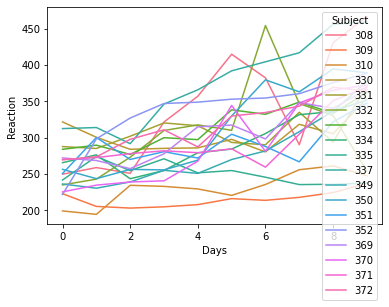

In [187]:
#plot the sleep study data
sns.lineplot(data = sleep_study, x = 'Days', y = 'Reaction', hue = 'Subject')

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

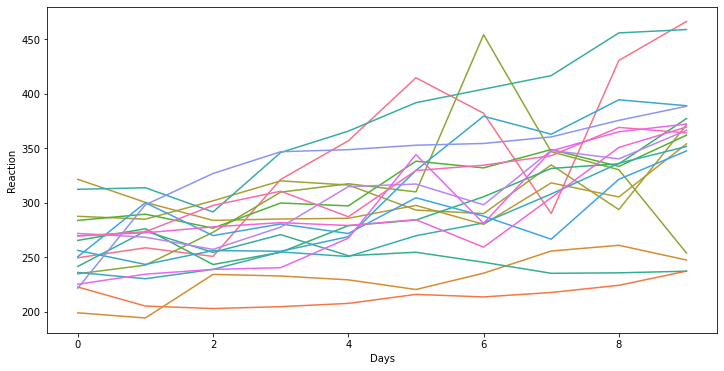

In [188]:
#adjust the line plot
plt.figure(figsize = (12, 6))
sns.lineplot(data = sleep_study, x = 'Days', y = 'Reaction', hue = 'Subject', legend=False)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

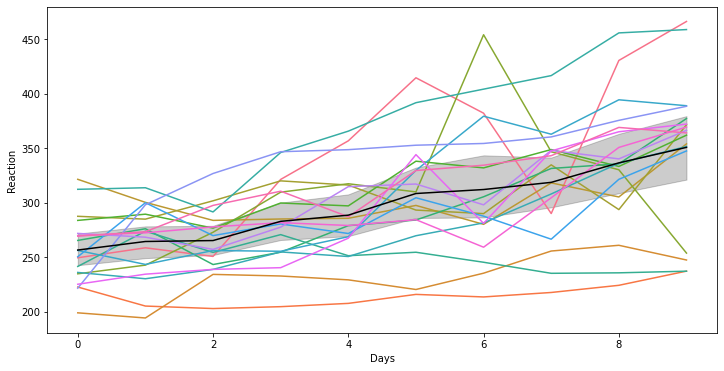

In [193]:
#add the average line
plt.figure(figsize = (12, 6))
sns.lineplot(data = sleep_study, x = 'Days', y = 'Reaction', hue = 'Subject', legend=False)
sns.lineplot(data = sleep_study, x = 'Days', y = 'Reaction',estimator = 'mean', color = 'black')